# A visual priority queue

Take a structured schema database as input, convert to a pandas dataframe, and output a visual priority queue. Highest priority items (lowest rank) are at the top, lower priority items are at the bottom. Nodes are first ranked  relative to one another. Node cells are colored based on their absolute value.

In [207]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [208]:
df = pd.read_csv('data.csv')

## First sort by priority column

This column can exist in the data, or you can create a mapping from one or more columns to a new column labeled "priority"

In [209]:
df = df.sort_values('value',ascending=True)
df.head()

,top_label,bottom_label,value,block_decoration
0,0,a,0,white
1,1,b,1,green
2,2,c,2,green
3,3,d,2,green
4,4,e,3,green


## Clean up ordering

Resolve relative ordering.

In [210]:
level_cnts = df['value'].value_counts().sort_index().reset_index(drop=True)
level_cnts.head()

0    1
1    1
2    2
3    5
4    5
Name: value, dtype: int64

Above is a mapping betweenthe "depth" of the visual priority queue in the left column, and the number of nodes at that depth in the right column.

In [211]:
df['relative_priority'] = [level for level,count in enumerate(level_cnts.values) for count in range(count)]
df

,top_label,bottom_label,value,block_decoration,relative_priority
0,0,a,0,white,0
1,1,b,1,green,1
2,2,c,2,green,2
3,3,d,2,green,2
4,4,e,3,green,3
5,5,f,3,green,3
6,6,g,3,green,3
7,7,h,3,yellow,3
8,8,i,3,green,3
13,13,n,4,green,4


## Great, we sorted out the priority index problem

That said, it's time to start thinking about these priorities in terms of the graph. In general, priorities indicate a *vertical offset*, with high numbers indicating lower positioning on the graph. Furthermore, we do not want a long vertical strip of target cells, we also want to *offset equal priority target cells horizontally*

In [212]:
# As described above, highest priority items belong at the bottom of the graph. Let's take the priority max minus
# the priority to reflect the way we need to graph this. We have to do this because axes positioning begins with (0,0)
# in the lower left hand corner.

df['vert_offset'] = np.max(df['relative_priority'].values) - df['relative_priority']
df

,top_label,bottom_label,value,block_decoration,relative_priority,vert_offset
0,0,a,0,white,0,23
1,1,b,1,green,1,22
2,2,c,2,green,2,21
3,3,d,2,green,2,21
4,4,e,3,green,3,20
5,5,f,3,green,3,20
6,6,g,3,green,3,20
7,7,h,3,yellow,3,20
8,8,i,3,green,3,20
13,13,n,4,green,4,19


Now let's work on the horizontal offset.

In [213]:
horiz_range = df['vert_offset'].value_counts().sort_index().values
df.sort_values('vert_offset',inplace=True) 
df['horiz_offset'] = [offset for offset in horiz_range for offset in range(offset)]
df

,top_label,bottom_label,value,block_decoration,relative_priority,vert_offset,horiz_offset
42,42,rr,27,orange,23,0,0
38,38,nn,27,orange,23,0,1
41,41,qq,27,orange,23,0,2
40,40,pp,27,orange,23,0,3
39,39,oo,27,orange,23,0,4
37,37,mm,26,orange,22,1,0
36,36,ll,24,orange,21,2,0
35,35,kk,23,orange,20,3,0
34,34,jj,21,orange,19,4,0
33,33,ii,20,orange,18,5,0


Matplotlib likes to scale things from 0 to 1, so let's divide each offset column y the max offset in the column to ensure we have enough room to place things.

In [214]:
df_vert_max = df['vert_offset'].max()+1
df_horiz_max = df['horiz_offset'].max()+1
df['vert_offset'] = df['vert_offset']/df_vert_max
df['horiz_offset'] = df['horiz_offset']/df_horiz_max
value_max = df['value'].max()

Now let's turn this into a *dictionary* of objects that matplotlib should print on a screen.

In [215]:
graph_nodes = list(df.T.to_dict().values())
for count,i in enumerate(graph_nodes):
    print(i)
    if count>5:
        print("eh...that's enough, I get it.")
        break

{'top_label': 42, 'bottom_label': 'rr', 'value': 27, 'block_decoration': 'orange', 'relative_priority': 23, 'vert_offset': 0.0, 'horiz_offset': 0.0}
{'top_label': 38, 'bottom_label': 'nn', 'value': 27, 'block_decoration': 'orange', 'relative_priority': 23, 'vert_offset': 0.0, 'horiz_offset': 0.2}
{'top_label': 41, 'bottom_label': 'qq', 'value': 27, 'block_decoration': 'orange', 'relative_priority': 23, 'vert_offset': 0.0, 'horiz_offset': 0.4}
{'top_label': 40, 'bottom_label': 'pp', 'value': 27, 'block_decoration': 'orange', 'relative_priority': 23, 'vert_offset': 0.0, 'horiz_offset': 0.6}
{'top_label': 39, 'bottom_label': 'oo', 'value': 27, 'block_decoration': 'orange', 'relative_priority': 23, 'vert_offset': 0.0, 'horiz_offset': 0.8}
{'top_label': 37, 'bottom_label': 'mm', 'value': 26, 'block_decoration': 'orange', 'relative_priority': 22, 'vert_offset': 0.041666666666666664, 'horiz_offset': 0.0}
{'top_label': 36, 'bottom_label': 'll', 'value': 24, 'block_decoration': 'orange', 'relat

## In terms of data required to plot an image, we are done. 

We haven't discussed how to actually put this stuff on a screen, however. Let's try some junk.

In [216]:
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec

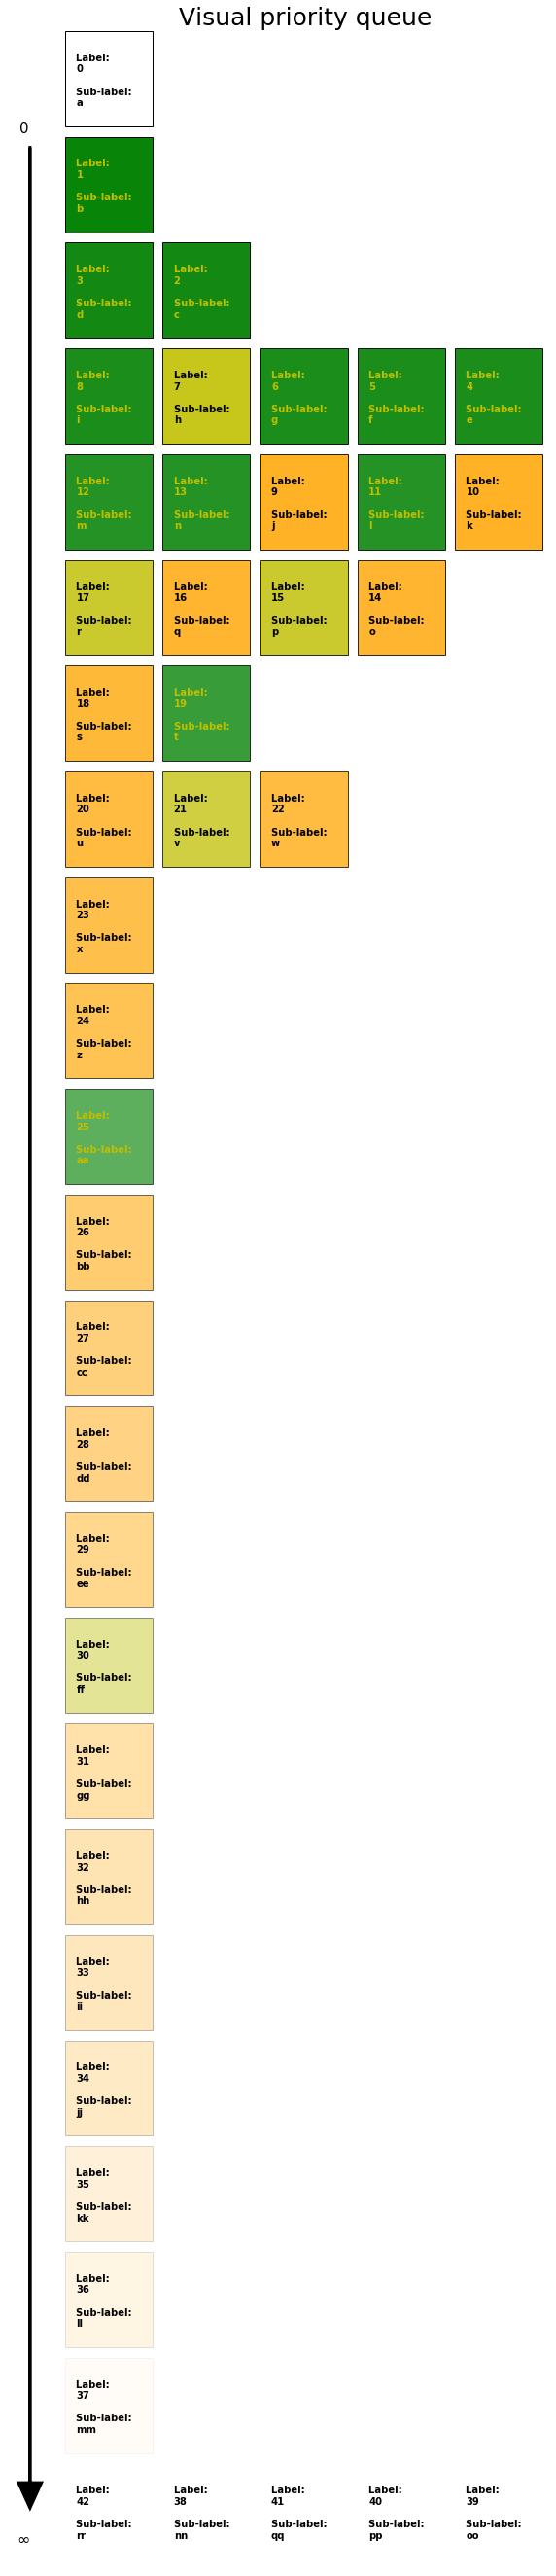

In [226]:

# Choose whatever aspect ratio 
aspect = [2,2]

# Choose horizontal width equal to the max number of rows in any priority rank.
fig = plt.figure(figsize=(aspect[0]*df_horiz_max, aspect[1]*df_vert_max))

# This axis will be used for our main grid
# NOTE: gs[row,column], where row=0 is the top.
gs = gridspec.GridSpec(1, 10)
ax = fig.add_subplot(gs[0,1:])

# This axis will keep our arrow indicating increasing priority rank
ax2 = fig.add_subplot(gs[0,0])
ax2.text(0.25,0.96,r"$0$",fontsize=3*df_horiz_max)
ax2.text(0.2,0.01,r'$\infty$',fontsize=3*df_horiz_max+1)
ax2.arrow(0.5,0.954,0.0,-0.92,
         head_width=0.5,head_length=0.01,linewidth=3,
         fc='k',ec='k')

ax.set_title('Visual priority queue',fontsize=5*df_horiz_max)
patches = []



for cell in graph_nodes:

    fontc='k'
    
    corner= [cell['horiz_offset'] + 0.006,
             cell['vert_offset']  + 0.004]
    
    # Take care of encoding boxes based on our achievement level
    if cell['block_decoration'] == 'green':
        fc='g'
        fontc='y'
    elif cell['block_decoration'] == 'white':
        fc='white'
    elif cell['block_decoration'] == 'yellow':
        fc='y'
    elif cell['block_decoration'] == 'orange':
        fc='orange'
        
    fancybox = mpatches.FancyBboxPatch(
        corner,
        # box width
        1/df_horiz_max-0.1*1/df_horiz_max,
        # box height
        1/df_vert_max-0.1*1/df_vert_max,
        boxstyle=mpatches.BoxStyle("Square",pad=0),
        fc=fc,ec='k',alpha=(1-(cell['value'])/(value_max)))
    
    ax.text(cell['horiz_offset'] + 0.009 + 1/(10*df_horiz_max),
            cell['vert_offset']  + 0.008 + 1/(10*df_vert_max),
            "Label: \n"+str(cell['top_label'])+"\n\n"+"Sub-label: \n" + str(cell['bottom_label']),
            fontsize=10,
            color=fontc).set_weight('bold')
    ax.add_patch(fancybox)

ax.axis('off')
ax2.axis('off')

plt.show()